<a href="https://colab.research.google.com/github/soroush-04/Apple_Stock_Prediction/blob/main/AppleStockPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas_datareader

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 20.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [ ]:
pip install --upgrade pandas-datareader

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355125,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421074,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798401,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771545,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.191582,144114400


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


In [ ]:
df = df.drop(['Date'], axis = 1)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
3,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,7.510714,7.571429,7.466429,7.570714,6.434675,447610800
...,...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,69.355125,98572000
2511,71.172501,71.222504,70.730003,71.067497,69.421074,48478800
2512,71.205002,72.495003,71.175003,72.477501,70.798401,93121200
2513,72.779999,73.492500,72.029999,72.449997,70.771545,146266000


In [ ]:
df = df.drop(['Adj Close'], axis = 1)

In [ ]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


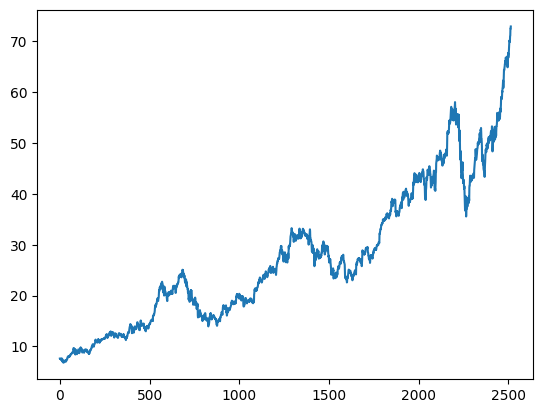

In [ ]:
plt.plot(df.Close)
# Here x axis is sample number and Y axis is closing prices

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100
# moving average = from first 100 days it will calculate last 100 days moving average

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

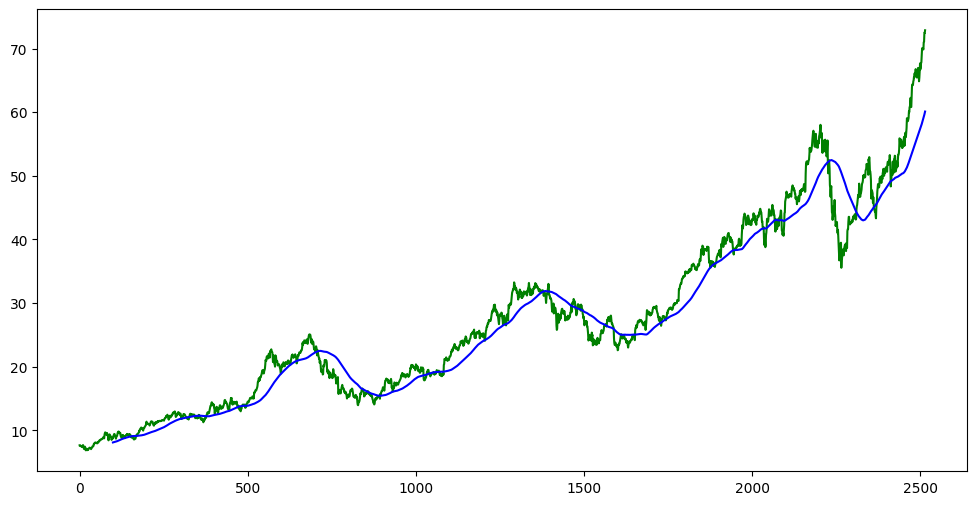

In [ ]:
# ploting the Average value
plt.figure(figsize = (12,6))
plt.plot(df.Close, 'g')
plt.plot(ma100, 'b')

In [ ]:
#calcuulating average og 200 days
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

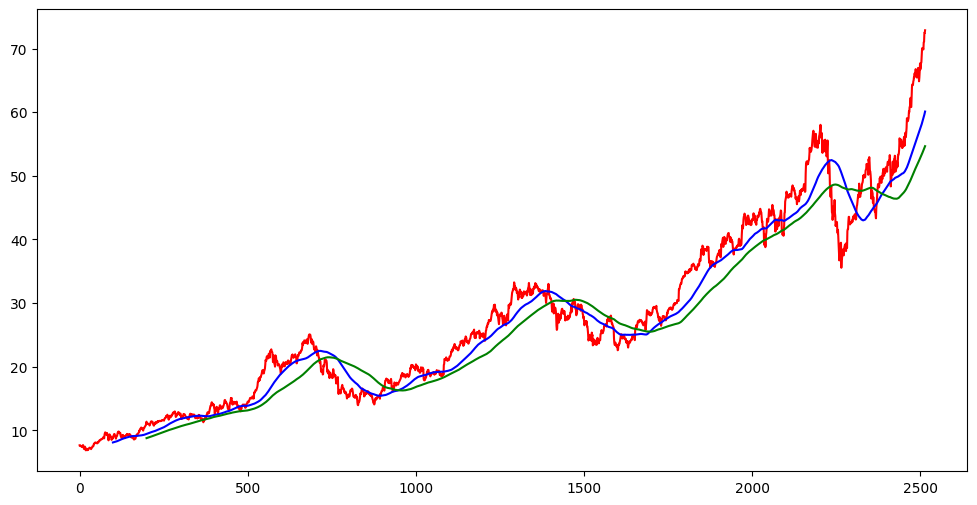

In [ ]:
# ploting the Moving average of 100, 200 days with original close price Average value
plt.figure(figsize = (12,6))
plt.plot(df.Close, 'r')
plt.plot(ma100, 'b')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(2515, 5)

In [ ]:
# splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

In [ ]:
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
# Scaling down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [ ]:
#scaler.fit automaticcaly gives an array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [ ]:
data_training_array.shape

(1760, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

In [ ]:
y_train


[0.08295551228400305,
 0.08773257990217087,
 0.09307799845000786,
 0.09730023009576089,
 0.0961770070574276,
 0.08648757770355114,
 0.07969414350828452,
 0.07751538062663765,
 0.06921979868242539,
 0.0791122414851117,
 0.08317207682631655,
 0.08421406557612648,
 0.09153526969304987,
 0.10176602006208679,
 0.10801813324219289,
 0.11099529041682749,
 0.1057175550640102,
 0.11069759999473855,
 0.10680016095808181,
 0.10413424529903986,
 0.10102168559811647,
 0.10318693352250902,
 0.0867717531683857,
 0.08049257393752157,
 0.07636509153754628,
 0.07428107790167715,
 0.07656810498635613,
 0.09015490110439062,
 0.08937002176865727,
 0.09144055658352146,
 0.08828741587458566,
 0.08085794755463022,
 0.08211646471050432,
 0.08038430973448946,
 0.07828674500511662,
 0.07244058645013152,
 0.08097972671491666,
 0.08415993347461043,
 0.09062857506078076,
 0.09187357725940049,
 0.09098043372063502,
 0.09747614135756338,
 0.09325390971181036,
 0.0893970878194153,
 0.08823328377306966,
 0.094458330902

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.07403745],
        [0.07195343],
        [0.07045129]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.07195343],
        [0.07045129],
        [0.08295551]],

       [[0.02560389],
        [0.02507608],
        [0.02697067],
        ...,
        [0.07045129],
        [0.08295551],
        [0.08773258]],

       ...,

       [[0.74224237],
        [0.74300022],
        [0.7582516 ],
        ...,
        [0.84795991],
        [0.84900194],
        [0.84170783]],

       [[0.74300022],
        [0.7582516 ],
        [0.76668248],
        ...,
        [0.84900194],
        [0.84170783],
        [0.84388656]],

       [[0.7582516 ],
        [0.76668248],
        [0.7708505 ],
        ...,
        [0.84170783],
        [0.84388656],
        [0.85089656]]])

In [ ]:
# ML MODEl
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



#2nd
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


#3rd
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


#4th
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs =50 )

Epoch 1/50
52/52 [==============================] - 26s 366ms/step - loss: 0.0652
Epoch 2/50
52/52 [==============================] - 19s 360ms/step - loss: 0.0132
Epoch 3/50
52/52 [==============================] - 19s 370ms/step - loss: 0.0116
Epoch 4/50
52/52 [==============================] - 21s 410ms/step - loss: 0.0106
Epoch 5/50
52/52 [==============================] - 19s 371ms/step - loss: 0.0095
Epoch 6/50
52/52 [==============================] - 19s 374ms/step - loss: 0.0089
Epoch 7/50
52/52 [==============================] - 20s 386ms/step - loss: 0.0086
Epoch 8/50
52/52 [==============================] - 19s 360ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 19s 364ms/step - loss: 0.0080
Epoch 10/50
52/52 [==============================] - 21s 409ms/step - loss: 0.0084
Epoch 11/50
52/52 [==============================] - 19s 369ms/step - loss: 0.0081
Epoch 12/50
52/52 [==============================] - 20s 380ms/step - loss: 0.0075
Epoch 13/50
5

In [ ]:
#let save the model
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
# final_df = past_100_days.append(data_testing, ignore_index=True)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
#making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 97ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [ ]:
y_predicted

array([[0.1424425 ],
       [0.14334115],
       [0.14418468],
       [0.14494693],
       [0.14560968],
       [0.14616477],
       [0.14662127],
       [0.14700624],
       [0.14735374],
       [0.14769784],
       [0.14806533],
       [0.14846909],
       [0.14891683],
       [0.14941312],
       [0.14995465],
       [0.15053305],
       [0.15113793],
       [0.15175676],
       [0.15238716],
       [0.15303591],
       [0.1537083 ],
       [0.1544038 ],
       [0.15511471],
       [0.15587808],
       [0.1567604 ],
       [0.15781811],
       [0.1590987 ],
       [0.1605828 ],
       [0.16229826],
       [0.16426149],
       [0.16646658],
       [0.16889535],
       [0.17153165],
       [0.1743592 ],
       [0.1773538 ],
       [0.18046276],
       [0.18366179],
       [0.18692842],
       [0.1902353 ],
       [0.19355378],
       [0.1968573 ],
       [0.20012191],
       [0.20333835],
       [0.20649922],
       [0.20959705],
       [0.21262065],
       [0.21555592],
       [0.218

In [ ]:
scaler.scale_

array([0.02123255])

In [ ]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

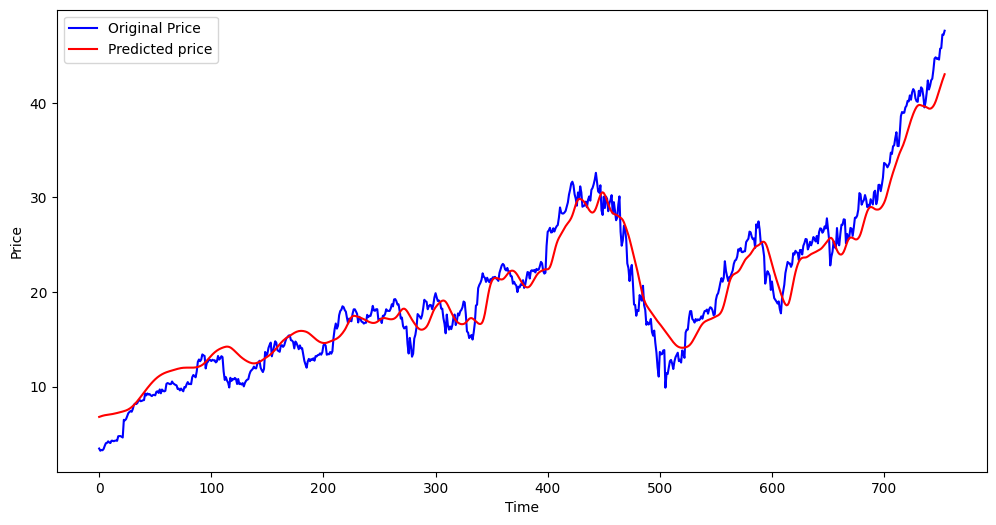

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()